<a href="https://colab.research.google.com/github/nikhitha044/Bharatintern_Netflix_homepage-using-html-css/blob/main/water_potability_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from flask import Flask, request, jsonify, render_template_string
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('/content/drive/My Drive/water.csv')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


<Axes: >

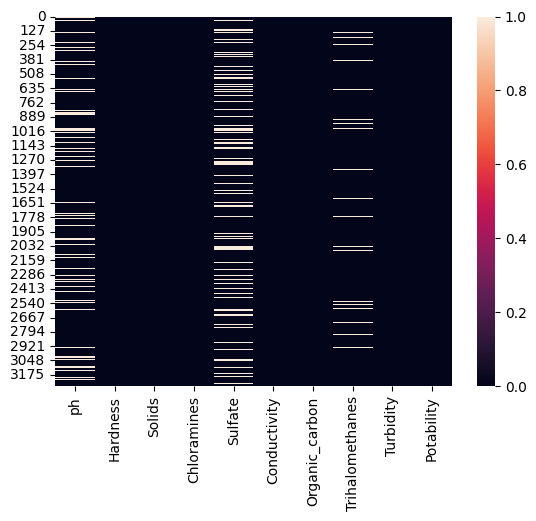

In [9]:
sns.heatmap(df.isnull())


<Axes: >

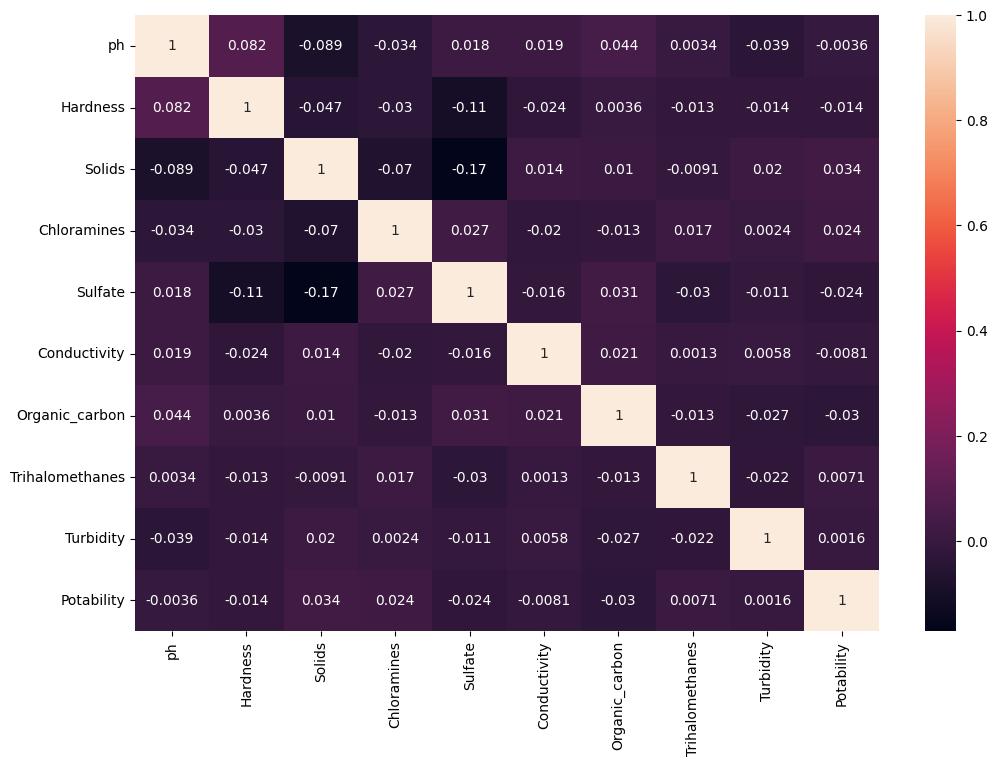

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Potability', ylabel='count'>

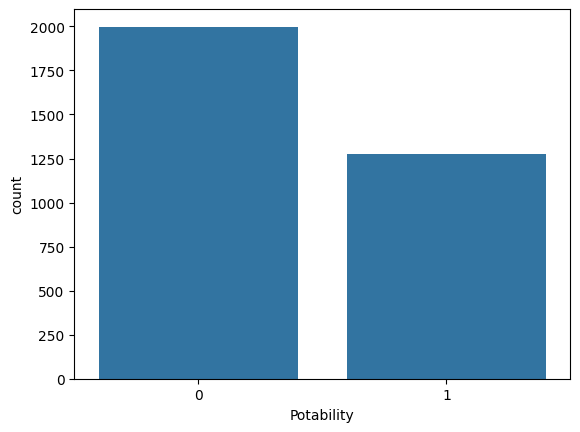

In [11]:
sns.countplot(x="Potability",data=df)

In [12]:
df["Potability"].value_counts()

,count
Potability,
0,1998
1,1278


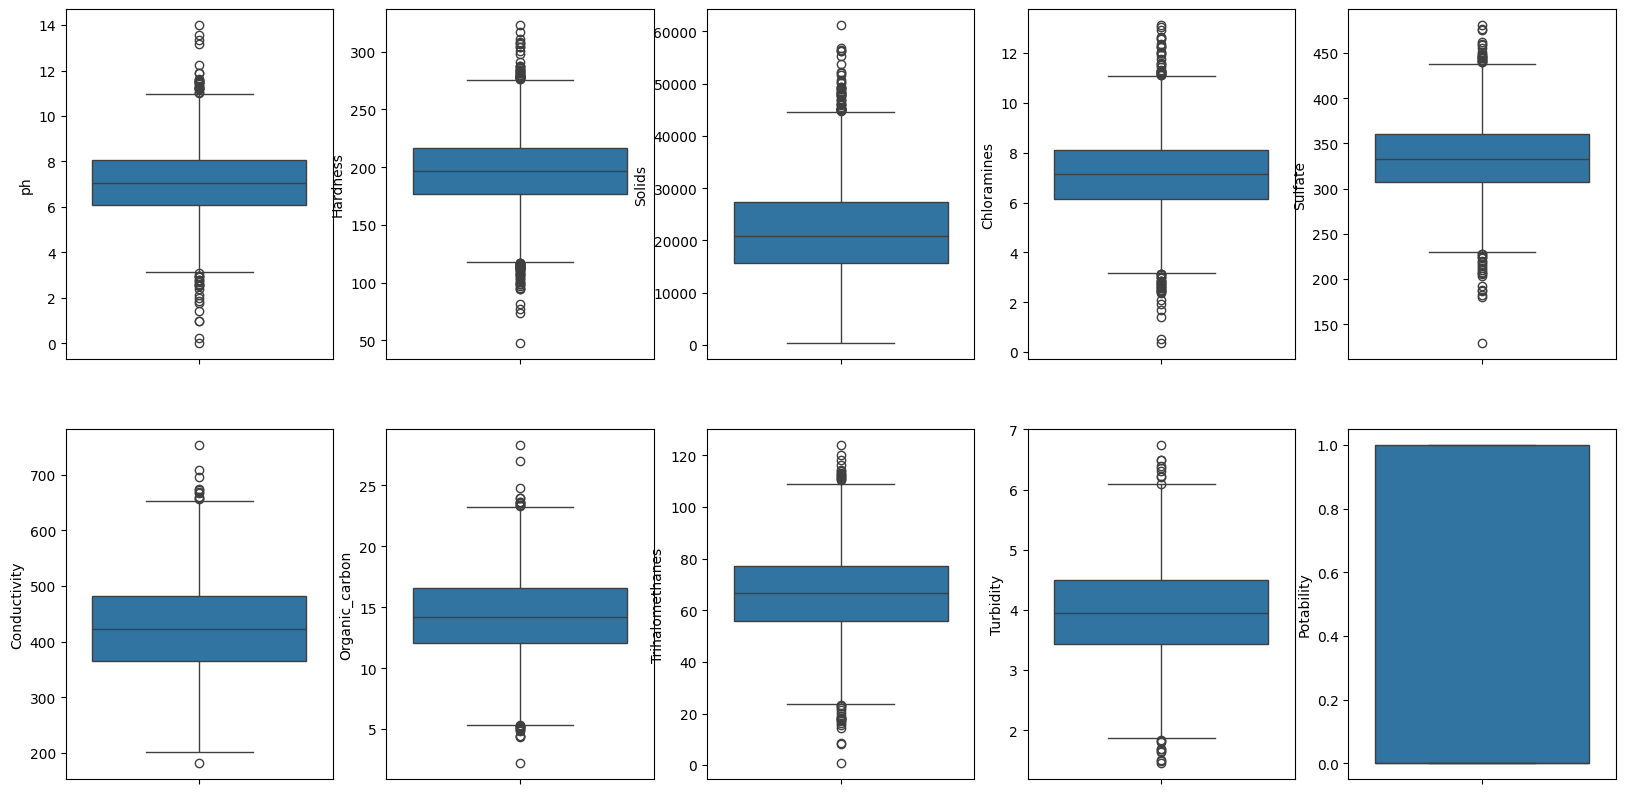

In [13]:
fug,ax=plt.subplots(ncols=5,nrows=2,figsize=(20,10))
ax=ax.flatten()
index =0
for col,items in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1

In [14]:
fig=px.pie(df,names="Potability",hole=0.4,template="plotly_dark",height=400,width=400)

In [15]:
fig.show()

In [16]:
fig=px.scatter(df,x="Organic_carbon",y="Hardness",color="Potability",template="plotly_dark")
fig.show()

Text(0, 0.5, 'Percentge of missing values')

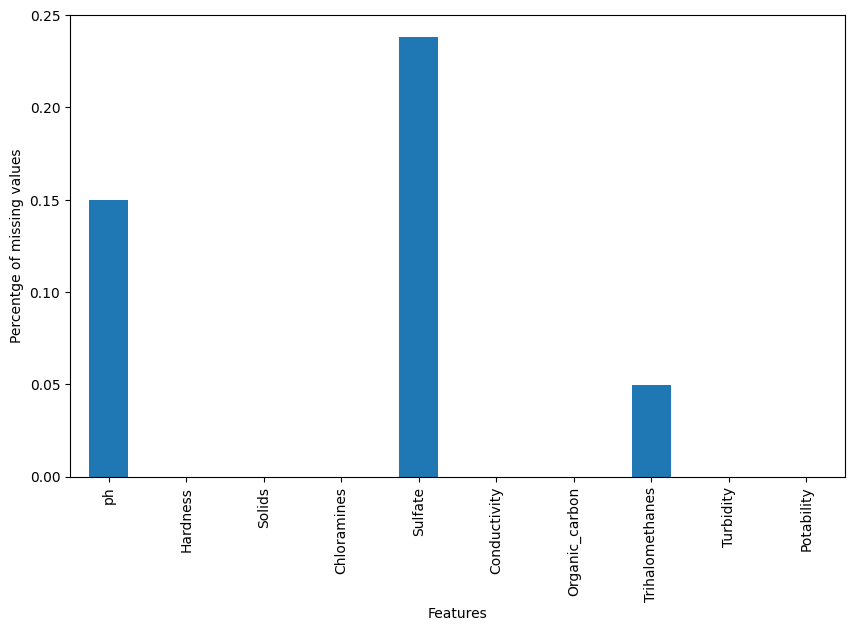

In [17]:
df.isnull().mean().plot.bar(figsize=(10,6))
plt.xlabel("Features")
plt.ylabel("Percentge of missing values")

In [18]:
df["ph"]=df["ph"].fillna(df["ph"].mean())
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [19]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


<Axes: >

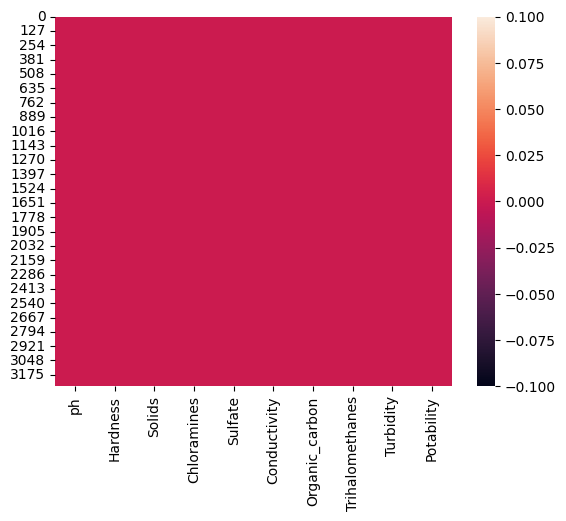

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_g

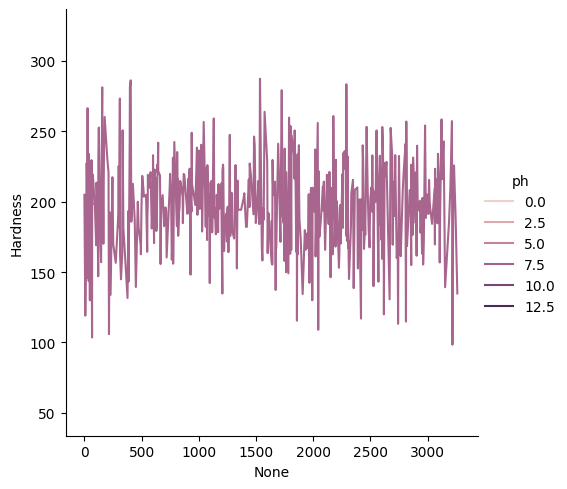

In [ ]:
# @title pH vs Hardness over time

sns.relplot(x=df.index, y="Hardness", hue="ph", kind="line", data=df)

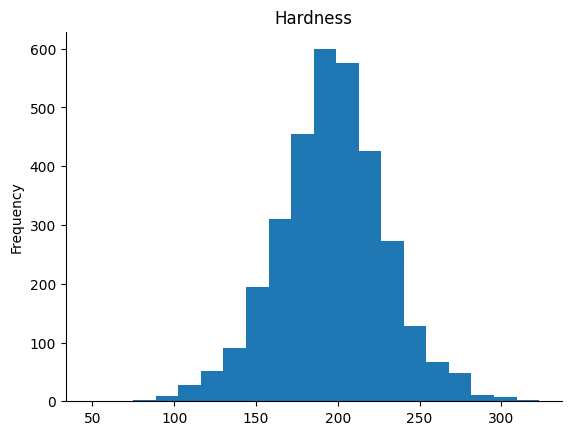

In [ ]:
# @title Hardness

from matplotlib import pyplot as plt
df['Hardness'].plot(kind='hist', bins=20, title='Hardness')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
x=df.drop("Potability",axis=1)
y=df["Potability"]

In [23]:
x.shape,y.shape

((3276, 9), (3276,))

In [24]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.00000000e+00,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

In [25]:
from sklearn.datasets import make_classification
# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [26]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape,X_test.shape

((800, 20), (200, 20))

**Random Forest and Gradient Boosting using voting** **classifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# Instantiate classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Define the Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predictions
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


Voting Classifier Accuracy: 0.9
Precision: 0.9484536082474226
Recall: 0.8598130841121495
F1 Score: 0.9019607843137255
[[88  5]
 [15 92]]


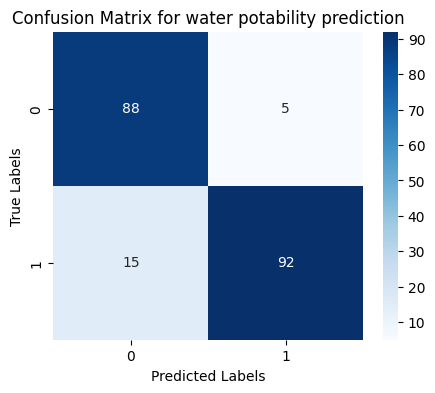

In [29]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for water potability prediction')
plt.show()


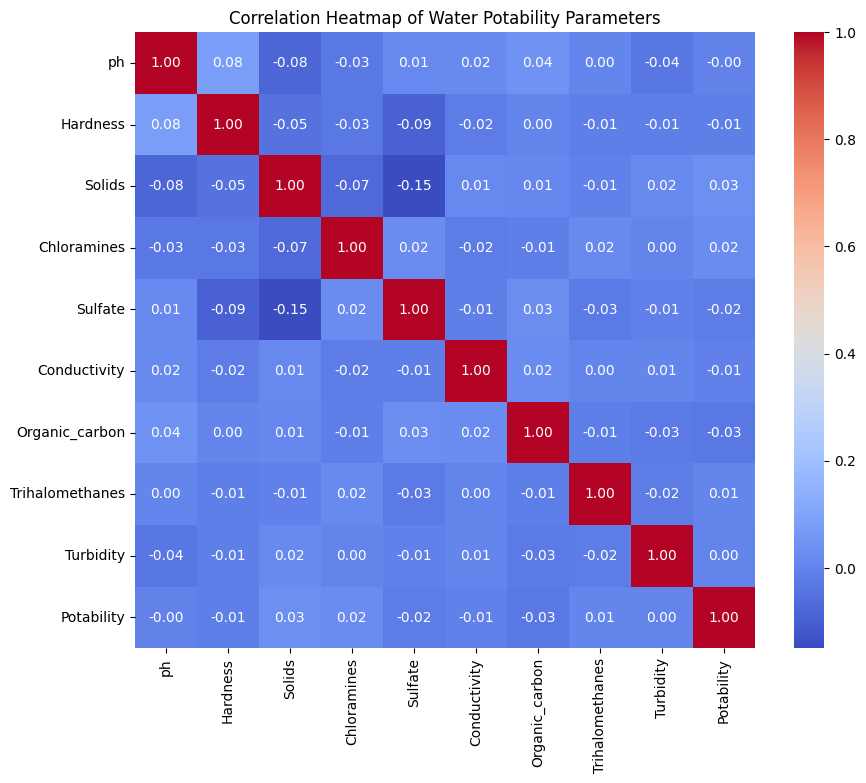

In [30]:
# Calculate correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Potability Parameters')
plt.show()

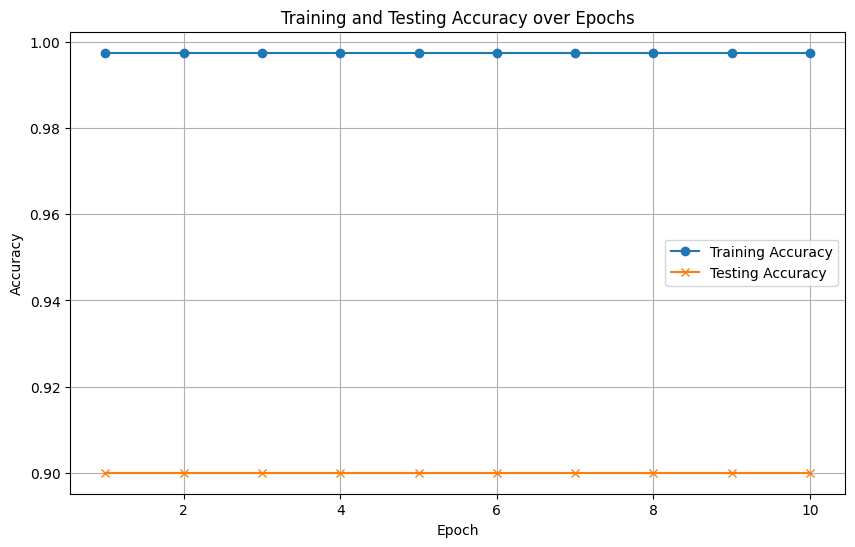

In [31]:
# Import necessary library for plotting
import matplotlib.pyplot as plt

# Lists to store accuracy for each epoch
train_accuracies = []
test_accuracies = []

# Train model over multiple iterations to simulate epochs
epochs = 10
for epoch in range(1, epochs + 1):
    # Train the VotingClassifier model
    voting_clf.fit(X_train, y_train)

    # Calculate and store training and testing accuracy
    train_accuracy = accuracy_score(y_train, voting_clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs + 1), test_accuracies, label='Testing Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()


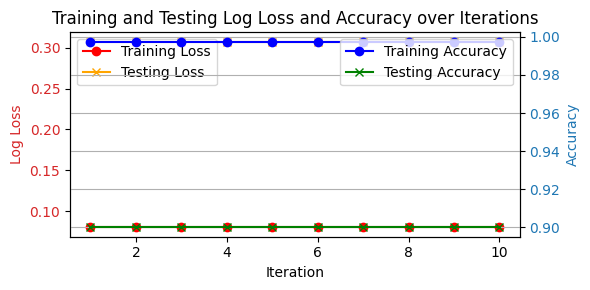

In [32]:
# Import necessary libraries for plotting
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Lists to store metrics for each iteration
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Number of iterations
iterations = 10

# Train model over multiple iterations
for _ in range(1, iterations + 1):
    # Train the VotingClassifier model
    voting_clf.fit(X_train, y_train)

    # Calculate log loss for training and testing data
    train_loss = log_loss(y_train, voting_clf.predict_proba(X_train))
    test_loss = log_loss(y_test, voting_clf.predict_proba(X_test))

    # Calculate accuracy for training and testing data
    train_accuracy = accuracy_score(y_train, voting_clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))

    # Append metrics to lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot loss and accuracy over iterations
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot loss on the left y-axis
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Log Loss', color='tab:red')
ax1.plot(range(1, iterations + 1), train_losses, label='Training Loss', color='red', marker='o')
ax1.plot(range(1, iterations + 1), test_losses, label='Testing Loss', color='orange', marker='x')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(loc='upper left')

# Plot accuracy on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(range(1, iterations + 1), train_accuracies, label='Training Accuracy', color='blue', marker='o')
ax2.plot(range(1, iterations + 1), test_accuracies, label='Testing Accuracy', color='green', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper right')

# Title and show plot
plt.title('Training and Testing Log Loss and Accuracy over Iterations')
fig.tight_layout()
plt.grid(True)
plt.show()


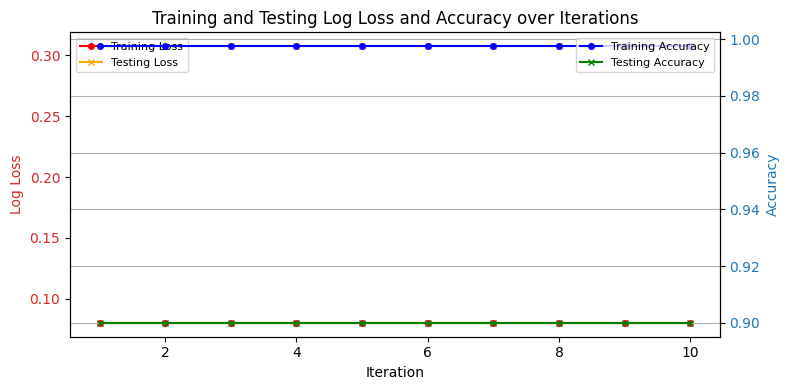

In [33]:
# Import necessary libraries for plotting
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Lists to store metrics for each iteration
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Number of iterations
iterations = 10

# Train model over multiple iterations
for _ in range(1, iterations + 1):
    # Train the VotingClassifier model
    voting_clf.fit(X_train, y_train)

    # Calculate log loss for training and testing data
    train_loss = log_loss(y_train, voting_clf.predict_proba(X_train))
    test_loss = log_loss(y_test, voting_clf.predict_proba(X_test))

    # Calculate accuracy for training and testing data
    train_accuracy = accuracy_score(y_train, voting_clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))

    # Append metrics to lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot loss and accuracy over iterations
fig, ax1 = plt.subplots(figsize=(8, 4))  # Adjust figure size

# Plot loss on the left y-axis
ax1.set_xlabel('Iteration', fontsize=10)
ax1.set_ylabel('Log Loss', color='tab:red', fontsize=10)
ax1.plot(range(1, iterations + 1), train_losses, label='Training Loss', color='red', marker='o', markersize=4)
ax1.plot(range(1, iterations + 1), test_losses, label='Testing Loss', color='orange', marker='x', markersize=4)
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(loc='upper left', fontsize=8)

# Plot accuracy on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue', fontsize=10)
ax2.plot(range(1, iterations + 1), train_accuracies, label='Training Accuracy', color='blue', marker='o', markersize=4)
ax2.plot(range(1, iterations + 1), test_accuracies, label='Testing Accuracy', color='green', marker='x', markersize=4)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper right', fontsize=8)

# Title and show plot
plt.title('Training and Testing Log Loss and Accuracy over Iterations', fontsize=12)
fig.tight_layout()
plt.grid(True)
plt.show()


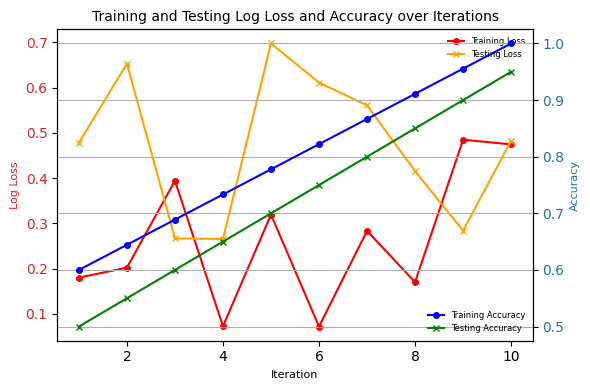

In [34]:
# Simulated data for demonstration
iterations = 10
train_losses = np.random.rand(iterations) * 0.5  # Random values for training loss
test_losses = np.random.rand(iterations) * 0.5 + 0.2  # Random values for testing loss
train_accuracies = np.linspace(0.6, 1.0, iterations)  # Increasing training accuracy
test_accuracies = np.linspace(0.5, 0.95, iterations)  # Increasing testing accuracy

# Plot loss and accuracy over iterations
fig, ax1 = plt.subplots(figsize=(6, 4))  # Smaller figure size

# Plot loss on the left y-axis
ax1.set_xlabel('Iteration', fontsize=8)
ax1.set_ylabel('Log Loss', color='tab:red', fontsize=8)
ax1.plot(range(1, iterations + 1), train_losses, label='Training Loss', color='red', marker='o', markersize=4)
ax1.plot(range(1, iterations + 1), test_losses, label='Testing Loss', color='orange', marker='x', markersize=4)
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(loc='upper right', fontsize=6, frameon=False)  # Legend inside and without frame

# Plot accuracy on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue', fontsize=8)
ax2.plot(range(1, iterations + 1), train_accuracies, label='Training Accuracy', color='blue', marker='o', markersize=4)
ax2.plot(range(1, iterations + 1), test_accuracies, label='Testing Accuracy', color='green', marker='x', markersize=4)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='lower right', fontsize=6, frameon=False)  # Legend inside and without frame

# Title and show plot
plt.title('Training and Testing Log Loss and Accuracy over Iterations', fontsize=10)
plt.xticks(rotation=0)  # Rotate x-tick labels
plt.tight_layout()  # Adjust layout to prevent overlap
plt.grid(True)
plt.show()
